In [98]:
import numpy as np
import pandas as pd
import pydotplus 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_wine, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from six import StringIO 
from IPython.display import Image

%matplotlib inline


#### Naive Bayes Classifier Building in Scikit-learn

In [99]:
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy'] 
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'] 
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [100]:
print(np.unique(weather))
print(np.unique(temp))

['Overcast' 'Rainy' 'Sunny']
['Cool' 'Hot' 'Mild']


In [101]:
le = LabelEncoder() 

weather_encoded = le.fit_transform(weather) 
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [102]:
temp_encoded = le.fit_transform(temp) 
label = le.fit_transform(play) 
print("Temp:",temp_encoded) 
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [103]:
features = list(zip(weather_encoded,temp_encoded)) 
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [104]:
model = GaussianNB() 

model.fit(features,label) 

predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
 
print("Predicted Value:", predicted)

Predicted Value: [1]


In [105]:
y_pred = model.predict(features)
confusion_matrix(label, y_pred)

array([[3, 2],
       [2, 7]], dtype=int64)

In [106]:
print(classification_report(label, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



In [107]:
model.predict([[1, 2]])

array([1], dtype=int64)

#### Naive Bayes with Multiple Labels

In [108]:
#Load dataset 
wine = load_wine()

In [109]:
print("Features: ", wine.feature_names) 
 
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [110]:
wine.data.shape

(178, 13)

In [111]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [112]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [113]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109)

In [114]:
gnb = GaussianNB() 

# train model
gnb.fit(X_train, y_train) 

GaussianNB()

In [115]:
y_pred = gnb.predict(X_test)

In [116]:
print(classification_report(y_train, gnb.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.98      0.99        52
           2       0.97      1.00      0.99        34

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



In [117]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


## Decision Tree Classifier

In [118]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", header=None, names=col_names)

In [119]:
pima.drop(0, axis=0, inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [120]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  768 non-null    object
 1   glucose   768 non-null    object
 2   bp        768 non-null    object
 3   skin      768 non-null    object
 4   insulin   768 non-null    object
 5   bmi       768 non-null    object
 6   pedigree  768 non-null    object
 7   age       768 non-null    object
 8   label     768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [121]:
numer = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'label'] 

# for col in numer:
#     pima[col] = pd.to_numeric(pima[col], errors='coerce')

pima = pima.apply(pd.to_numeric, errors='coerce')

In [122]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [123]:
pima.dropna(inplace=True)

In [124]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree'] 

X = pima[feature_cols].copy() # Features 
y = pima['label'].copy() # Target variable

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [126]:
clf = DecisionTreeClassifier() 

clf = clf.fit(X_train,y_train) 

y_pred = clf.predict(X_test)

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       146
           1       0.58      0.49      0.54        85

    accuracy                           0.68       231
   macro avg       0.66      0.64      0.65       231
weighted avg       0.68      0.68      0.68       231



In [128]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


#### Visualizing Decision Trees

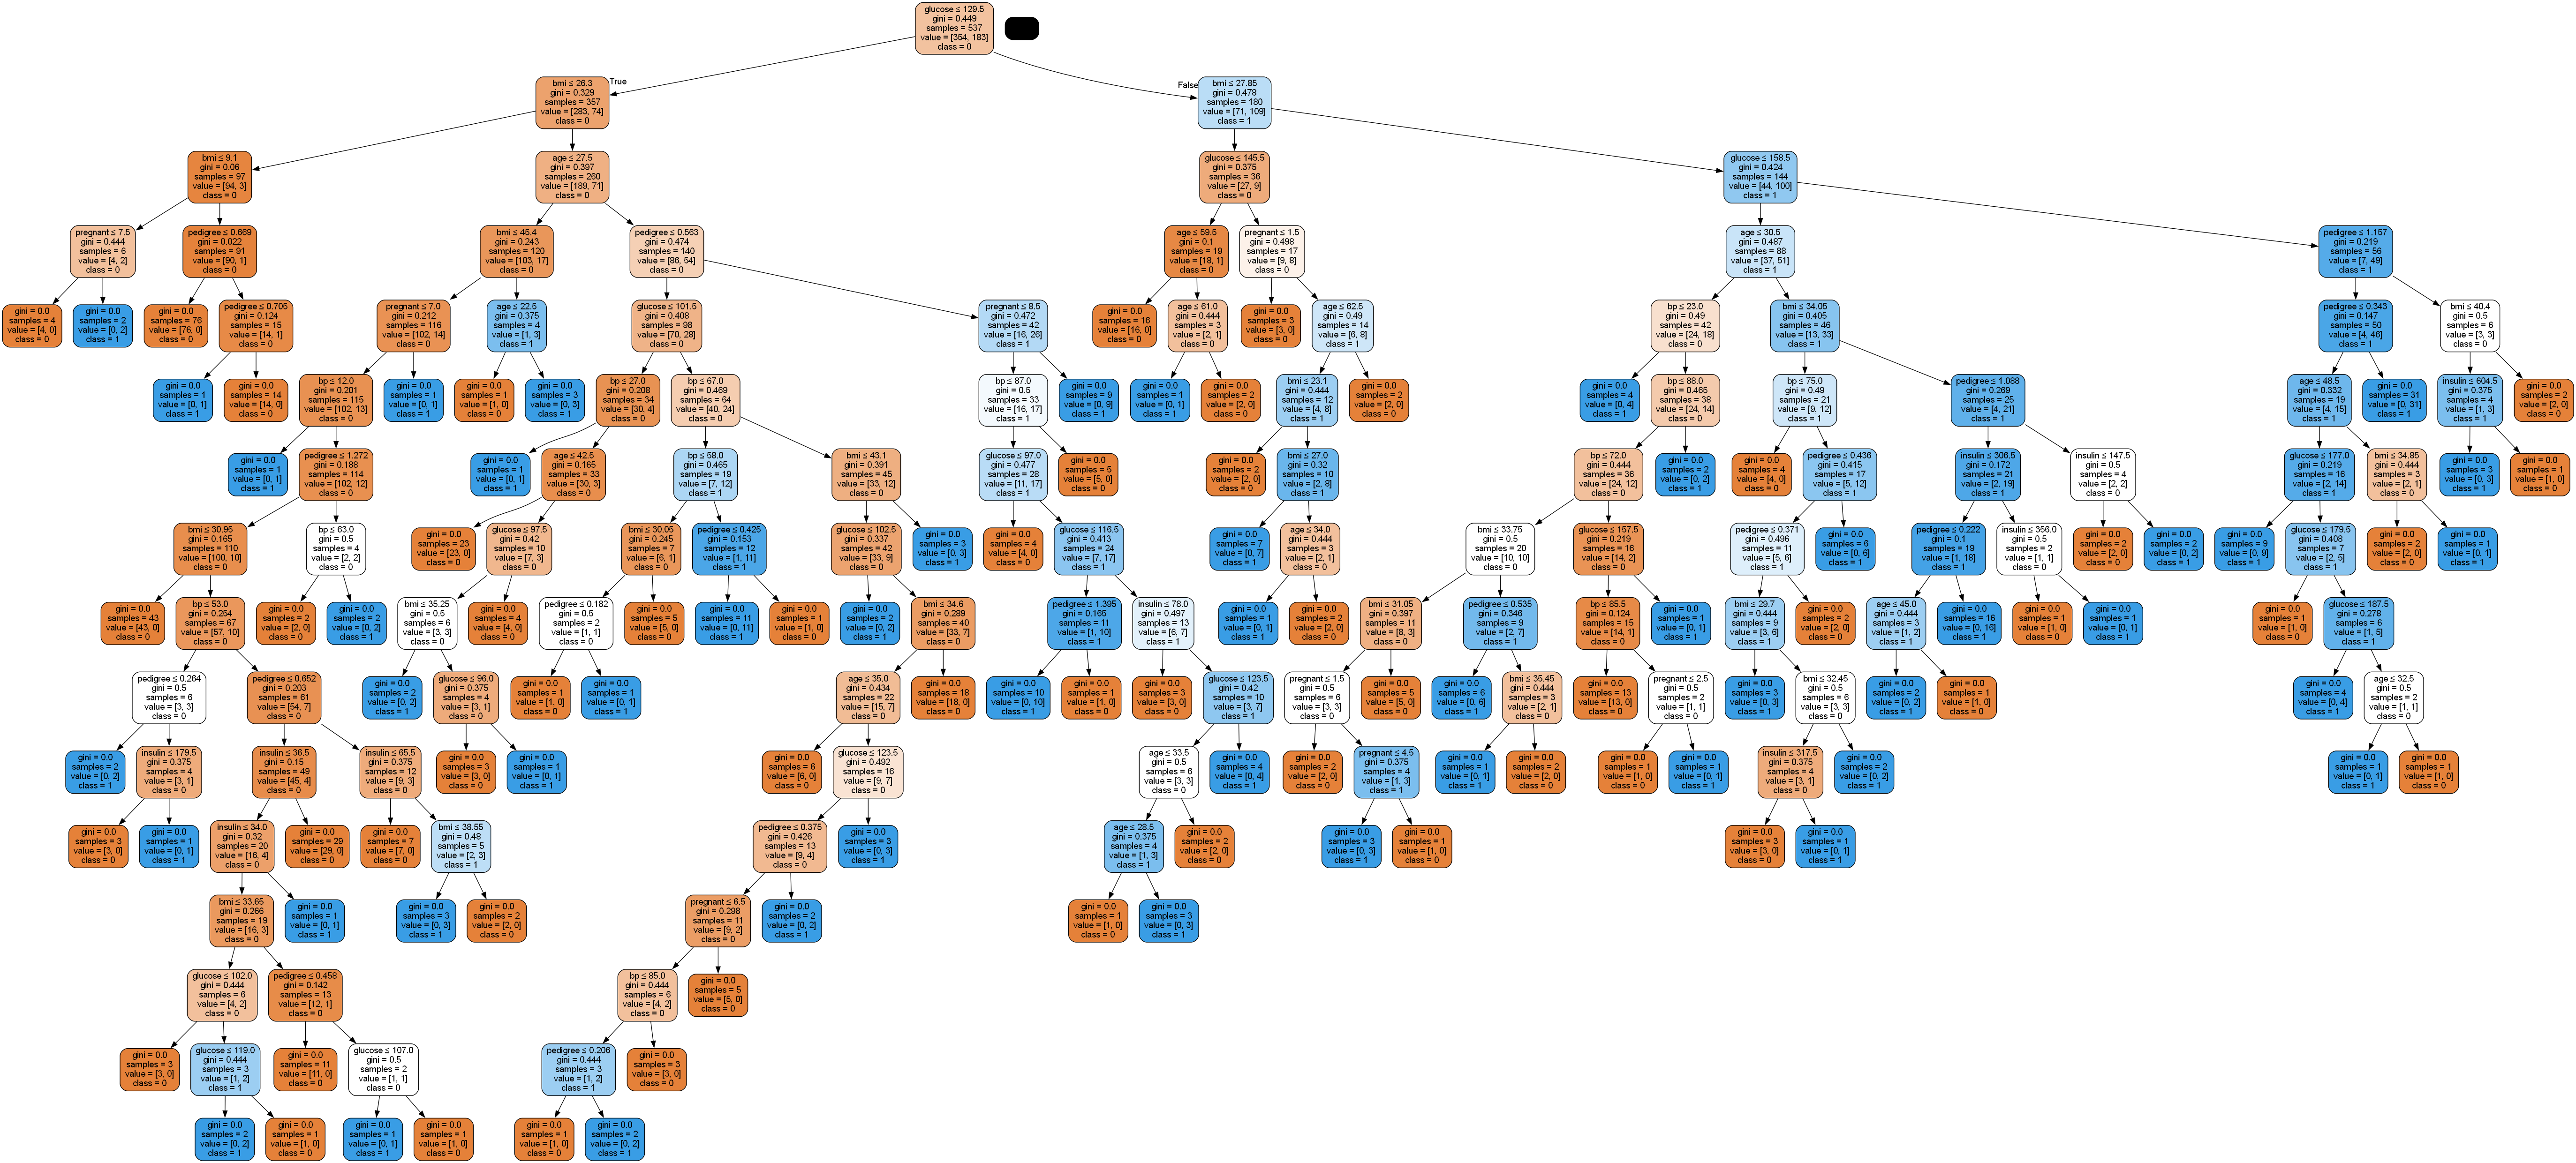

In [129]:
dot_data = StringIO() 
export_graphviz(clf, out_file=dot_data, 
                     class_names=['0','1'], # the target names. 
                     feature_names=feature_cols, # the feature names. 
                     filled=True, # Whether to fill in the boxes with colours. 
                     rounded=True, # Whether to round the corners of the boxes. 
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
                                           
Image(graph.create_png())

##### Optimizing Decision Tree Performance 
- criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain. 
- splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split
- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In [130]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) 

clf = clf.fit(X_train,y_train) 

y_pred = clf.predict(X_test) 

print(classification_report(y_train, clf.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       354
           1       0.68      0.57      0.62       183

    accuracy                           0.76       537
   macro avg       0.74      0.72      0.72       537
weighted avg       0.76      0.76      0.76       537

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



#### Random Forest

In [131]:
iris = load_iris()

In [132]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [133]:
print(iris.data[0:5])
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [134]:
feature_names = [i[:-5] for i in iris.feature_names]
data = pd.DataFrame(iris.data, columns=feature_names)
data['species'] = iris.target

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [136]:
data.shape

(150, 5)

In [137]:
X = pd.DataFrame(iris.data, columns=feature_names)  # Features 
y = pd.Series(iris.target, name='species') # Labels

X = data.iloc[:, :-1].copy()
y = data['species'].copy()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [139]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [140]:
clf.predict(X.iloc[[15]])

array([0])

In [141]:
pd.DataFrame(X.iloc[15, ::-1]).T

,petal width,petal length,sepal width,sepal length
15,0.4,1.5,4.4,5.7


In [142]:
clf.predict([[3, 5, 4, 2]])

d:\kmi\.env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

#### Finding Important Features in Scikit-learn

In [143]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [144]:
RandomForestClassifier( bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [145]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)  
feature_imp

petal length (cm)    0.528635
petal width (cm)     0.377110
sepal length (cm)    0.065148
sepal width (cm)     0.029107
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


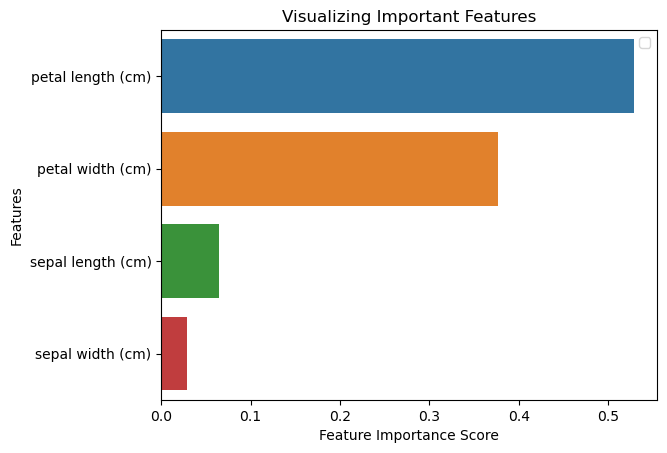

In [146]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score') 
plt.ylabel('Features') 
plt.title("Visualizing Important Features") 
plt.legend() 
plt.show()

#### Generating the Model on Selected Features

In [147]:
X = data[['petal length', 'petal width']].copy()
y = data['species'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [148]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


### SVM

In [149]:
cancer = load_breast_cancer()

In [150]:
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [151]:
cancer.data.shape

(569, 30)

In [152]:
pd.DataFrame(cancer.data, columns=cancer.feature_names).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [153]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [154]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [155]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)

In [156]:
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



#### Multiple Algorithm on Dataset

In [158]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [160]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [161]:
train.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train.fillna(train.mean(), inplace=True) 
train.isna().sum()

In [163]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True) 
train.Married.fillna(train.Married.mode()[0],inplace=True) 
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True) 

In [164]:
train.isna().sum().sum()

86

In [165]:
train['Loan_Amount_Term']=np.log(train['Loan_Amount_Term'])

In [166]:
X=train.drop(['Loan_ID','Loan_Status'], axis=1) 
y=train['Loan_Status']

In [167]:
X = pd.get_dummies(X) 

In [168]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,5.886104,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,5.886104,1.0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,5.886104,1.0,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,5.886104,1.0,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,5.886104,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True


In [169]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression() 
model.fit(x_train,y_train)

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression()

In [ ]:
pred_cv=model.predict(x_cv)

In [ ]:
print(accuracy_score(y_cv,pred_cv)) 
matrix=confusion_matrix(y_cv,pred_cv) 
print(matrix)

In [ ]:
dt = DecisionTreeClassifier() 
dt.fit(x_train,y_train)

In [ ]:
pred_cv1=dt.predict(x_cv)

In [ ]:
print(accuracy_score(y_cv,pred_cv1)) 
matrix1=confusion_matrix(y_cv,pred_cv1) 
print(matrix1)

In [ ]:
rf = RandomForestClassifier() 
rf.fit(x_train,y_train)

In [ ]:
pred_cv2=rf.predict(x_cv)

In [ ]:
print(accuracy_score(y_cv,pred_cv2)) 
matrix2=confusion_matrix(y_cv,pred_cv2) 
print(matrix2)

In [ ]:
svm_model= SVC() 
svm_model.fit(x_train,y_train)

In [ ]:
pred_cv3=svm_model.predict(x_cv)

In [ ]:
print(accuracy_score(y_cv,pred_cv3)) 
matrix3=confusion_matrix(y_cv,pred_cv3) 
print(matrix3)

In [ ]:
nb = GaussianNB() 

nb.fit(x_train,y_train) 
pred_cv4=nb.predict(x_cv) 
print(accuracy_score(y_cv,pred_cv4)) 
matrix4=confusion_matrix(y_cv,pred_cv4) 
print(matrix4)

In [ ]:
kNN = KNeighborsClassifier() 
kNN.fit(x_train,y_train) 
pred_cv5=kNN.predict(x_cv) 
print(accuracy_score(y_cv,pred_cv5)) 
matrix5=confusion_matrix(y_cv,pred_cv5) 
print(matrix5)

In [ ]:

print("Logistic Regression:", accuracy_score(y_cv,pred_cv))
print("Decision Tree:", accuracy_score(y_cv,pred_cv1))
print("Random Forest:", accuracy_score(y_cv,pred_cv2))
print("SVM:", accuracy_score(y_cv,pred_cv3))
print("Naive Bayes:", accuracy_score(y_cv,pred_cv4)) 
print("KNN:", accuracy_score(y_cv,pred_cv5))